<a href="https://colab.research.google.com/github/bayanbayrakdar/first-project/blob/main/improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
f=tf.keras.datasets.fashion_mnist
(train_image,train_labels),(test_image,test_labels)=f.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [23]:
train_image=train_image/255.0
test_image=test_image/255.0
(train_image,train_labels),(test_image,test_labels)=f.load_data()
train_image.shape

(60000, 28, 28)

In [28]:
#define the model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu), tf.keras.layers.Dense(10,activation=tf.nn.softmax)])


model.build((None, 28, 28, 1))
model.summary()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_image, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 97.5422 - accuracy: 0.6889


In [33]:
model=tf.keras.models.Sequential([
   # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
 # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train_image, train_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 800)               0         
                                                                 
 dense_32 (Dense)            (None, 128)             

NameError: ignored

1/1 [==============================] - 0s 22ms/step


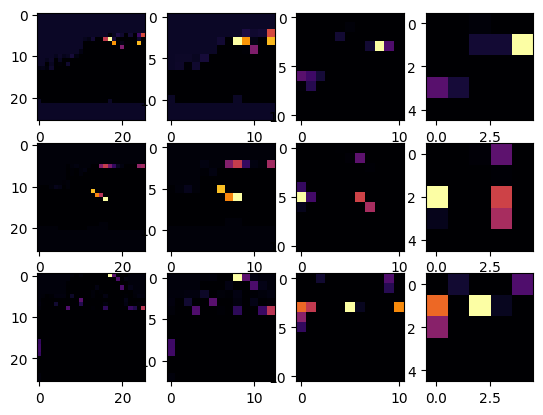

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=30
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)


In [ ]:
# @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ''  # @param
string_type = 'example'  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = '2010-11-05'  # @param {type: "date"}
pick_me = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" # @param ["apples", "bananas", "oranges"] {allow-input: true}
# @markdown ---


In [1]:
# @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ''  # @param
string_type = 'example'  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = '2010-11-05'  # @param {type: "date"}
pick_me = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" # @param ["apples", "bananas", "oranges"] {allow-input: true}
# @markdown ---


*99